# Aggregating Daily MTA DATA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [2]:
# Import Entries_per_day CSV sheet locally
df = pd.read_csv('/Users/zhaoze/Desktop/metis/week1/Entries_per_day.csv')
df.sort_values(by='Entries_per_day', ascending=False)

,Unnamed: 0,C/A,Entries_per_day,Full Time,SCP,Station
82363,90318,R311,1.953723e+09,2018-06-08,00-00-03,3 AV-149 ST
81968,89888,R288,1.570898e+09,2018-06-05,00-00-03,183 ST
59864,65569,N215,1.482155e+09,2018-06-25,00-00-02,182-183 STS
6532,7117,N006A,1.431688e+09,2018-06-11,00-00-00,190 ST
20123,21998,R311,1.253345e+09,2018-06-08,00-00-00,3 AV-149 ST
68324,74865,R288,1.219945e+09,2018-05-19,00-00-02,183 ST
239601,262382,N400A,1.033260e+09,2018-05-22,02-00-03,COURT SQ
239602,262383,N400A,1.033259e+09,2018-05-23,02-00-03,COURT SQ
45905,50260,R326,9.860181e+08,2018-06-27,00-00-01,BRONX PARK EAST
10301,11221,N221,7.018623e+08,2018-06-28,00-00-00,KINGSBRIDGE RD


## Average 2-Month Ridership

In [3]:
# Set a 15000 person cutoff for the max to get rid of nonsensical outliers
# df = df.loc[(df['Entries_per_day'] < 15000), :]
df = df[df['Entries_per_day'] < 15000]
# df = df.loc[(df['Entries_per_day'] > 0), :]
df = df[df['Entries_per_day'] > 0]
# df

In [4]:
twomonth = (df
 .groupby(['Station'])
#             ['Entries_per_day']
 .sum()
 .reset_index()
 .sort_values(by = 'Entries_per_day', ascending=False)
)

twomonth.head(5)

,Station,Unnamed: 0,Entries_per_day
60,34 ST-PENN STA,1011176327,8049160.0
232,GRD CNTRL-42 ST,482089778,7004845.0
58,34 ST-HERALD SQ,490689181,5493116.0
45,23 ST,561070293,5337666.5
14,14 ST-UNION SQ,478200041,5320481.0


In [5]:
twomonth.rename(columns={'Entries_per_day':'2months'},inplace=True)

# Get Top 10 Stations
topten_twomonth = twomonth.head(10)
topten_twomonth

,Station,Unnamed: 0,2months
60,34 ST-PENN STA,1011176327,8049160.0
232,GRD CNTRL-42 ST,482089778,7004845.0
58,34 ST-HERALD SQ,490689181,5493116.0
45,23 ST,561070293,5337666.5
14,14 ST-UNION SQ,478200041,5320481.0
352,TIMES SQ-42 ST,512634423,5075815.0
225,FULTON ST,972819267,4676937.0
67,42 ST-PORT AUTH,437011149,4601017.5
109,86 ST,376702924,4019731.0
9,125 ST,262326944,3829920.0


## Week Average 2 Month Ridership
Based on the top 10 stations above, I created a line plot to show the volume change over the week. 

In [6]:
# Make a numeric column corresponding to weekday
df['FullDate'] = pd.to_datetime(df['Full Time'])
df['weekday'] = df['FullDate'].dt.weekday
# df['weekday'].replace(0, 7)
df.weekday.loc[df['weekday'].isin([0])]=7
# df['weekday'] = df['weekday'].map({0: 7})
df.head()

/Users/zhaoze/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,C/A,Entries_per_day,Full Time,SCP,Station,FullDate,weekday
0,5,A006,950.0,2018-05-06,00-00-00,5 AV/59 ST,2018-05-06,6
1,6,A006,704.0,2018-05-07,00-00-00,5 AV/59 ST,2018-05-07,7
2,7,A006,1602.0,2018-05-08,00-00-00,5 AV/59 ST,2018-05-08,1
3,8,A006,1728.5,2018-05-09,00-00-00,5 AV/59 ST,2018-05-09,2
4,9,A006,1721.0,2018-05-10,00-00-00,5 AV/59 ST,2018-05-10,3


In [7]:
# Rename column
df.rename(columns={'Entries_per_day':'2months'},inplace=True)

# Get same Top six Stations
topten_twomonth_wkday = df[df.Station.isin(['34 ST-PENN STA','GRD CNTRL-42 ST','34 ST-HERALD SQ','23 ST','14 ST-UNION SQ','TIMES SQ-42 ST'])]


# Weekday specific Top 6 stations 
dfwkday = (topten_twomonth_wkday
 .groupby(['Station', 'weekday'])
 .sum()
 .reset_index()
 .sort_values(['Station', 'weekday'])
)

dic = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
dfwkday['weekday'].replace(dic,inplace=True)
dfwkday.head()

,Station,weekday,Unnamed: 0,2months
0,14 ST-UNION SQ,Monday,68501100,763751.5
1,14 ST-UNION SQ,Tuesday,68227477,857585.0
2,14 ST-UNION SQ,Wednesday,68227772,883650.0
3,14 ST-UNION SQ,Thursday,68248218,864219.0
4,14 ST-UNION SQ,Friday,68502284,870936.0


Text(0, 0.5, '2-Month Average')

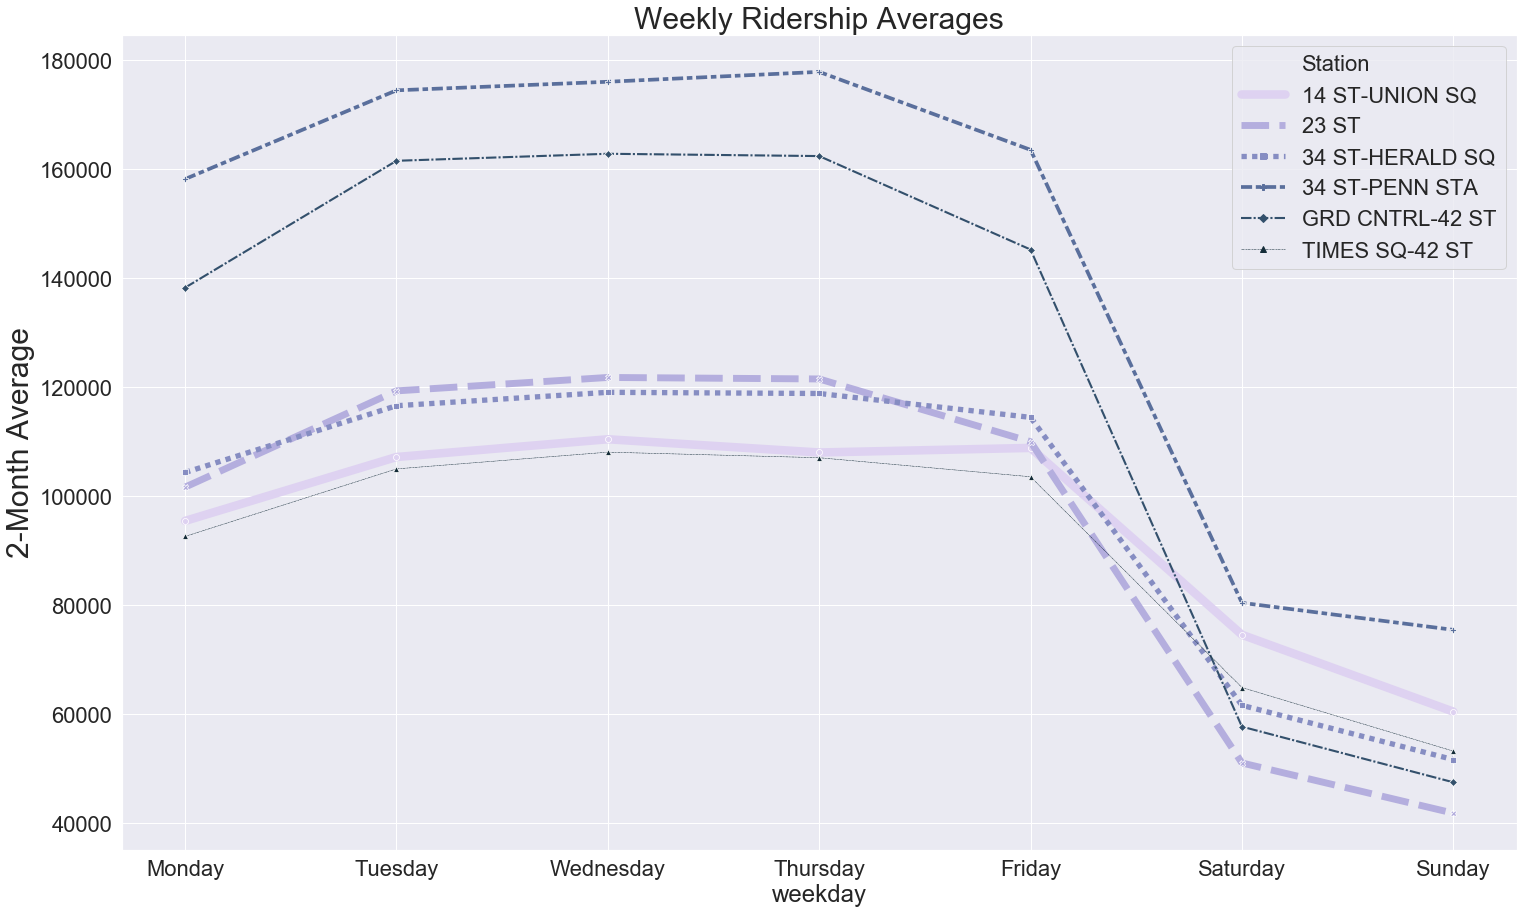

In [10]:
# create line plot
dfwkday['avg_entries'] = dfwkday['2months'] / 8
plt.figure(figsize=(25,15))
sns.set(font_scale = 2)
# ax = sns.lineplot(x="weekday", y="avg_entries", hue="Station",style="Station",markers=True, dashes=False, data=dfwkday,palette="Blues_d")
ax = sns.lineplot(x="weekday", y="avg_entries",hue="Station", style="Station", palette="ch:2.5,.25", size="Station", sizes=(0.5, 8.5), markers=True, data=dfwkday, sort=False)
sns.set(rc={'axes.facecolor':'white' })
ax.set_title('Weekly Ridership Averages', fontsize = 30)
# ax.set_xlabel("Weekdays",fontsize=30)
ax.set_ylabel("2-Month Average",fontsize=30)